In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [15]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
data['Amount'] = StandardScaler().fit_transform(data[['Amount']])

In [17]:
data = data.drop(['Time'],axis = 1)

In [18]:
normal_data = data[data['Class'] == 0].drop('Class',axis = 1)
anomaly_data = data[data['Class'] == 1].drop('Class',axis = 1)

In [19]:
x_train,x_test = train_test_split(normal_data,test_size = 0.2,random_state = 42)

In [20]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(x_train.shape[1], activation='sigmoid')
])


In [21]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [32]:
history = model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8111 - loss: 0.7447 - val_accuracy: 0.8194 - val_loss: 0.7504
Epoch 2/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8172 - loss: 0.7459 - val_accuracy: 0.8232 - val_loss: 0.7497
Epoch 3/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8215 - loss: 0.7335 - val_accuracy: 0.8262 - val_loss: 0.7492
Epoch 4/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8258 - loss: 0.7467 - val_accuracy: 0.8314 - val_loss: 0.7487
Epoch 5/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8287 - loss: 0.7372 - val_accuracy: 0.8336 - val_loss: 0.7483
Epoch 6/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8297 - loss: 0.7487 - val_accuracy: 0.8352 - val_loss: 0.7480
Epoch 7/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8324 - loss: 0.7193 - val_accuracy: 0.8351 - val_loss: 0.7477
Epoch 8/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8325 - loss: 0.7311 - val_accuracy: 0.

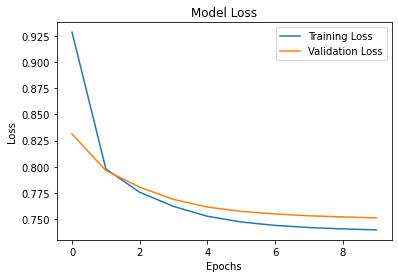

In [23]:
# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
reconstructed = model.predict(data.drop('Class',axis = 1))
reconstruction_error = np.mean(np.square(data.drop('Class',axis = 1) - reconstructed), axis = 1)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 6s 636us/step


In [25]:
threshold = np.percentile(reconstruction_error,95)

In [26]:
y_pred = (reconstruction_error > threshold).astype(int)
y_true = data['Class']

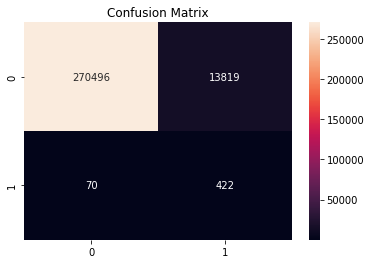

In [30]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_true, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [31]:
print("Classification Report:\n", classification_report(y_true, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.86      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.90      0.52    284807
weighted avg       1.00      0.95      0.97    284807

